In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

In [5]:
X = df.drop('label', axis = 1).values
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
earlyS = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience = 25)

model.add(Dense(784, activation = 'tanh'))
model.add(Dense(350, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data = (X_test, y_test), batch_size = 128, epochs=400, callbacks=[earlyS])

Epoch 1/400
230/230 [==============================] - 4s 16ms/step - loss: 2.2151 - val_loss: 1.0878
Epoch 2/400
230/230 [==============================] - 4s 18ms/step - loss: 0.9559 - val_loss: 0.8799
Epoch 3/400
230/230 [==============================] - 4s 15ms/step - loss: 0.6957 - val_loss: 0.7290
Epoch 4/400
230/230 [==============================] - 4s 15ms/step - loss: 0.5571 - val_loss: 0.6289
Epoch 5/400
230/230 [==============================] - 3s 15ms/step - loss: 0.4383 - val_loss: 0.5503
Epoch 6/400
230/230 [==============================] - 3s 15ms/step - loss: 0.3637 - val_loss: 0.6035
Epoch 7/400
230/230 [==============================] - 4s 16ms/step - loss: 0.3081 - val_loss: 0.4996
Epoch 8/400
230/230 [==============================] - 4s 18ms/step - loss: 0.2476 - val_loss: 0.5365
Epoch 9/400
230/230 [==============================] - 4s 16ms/step - loss: 0.2105 - val_loss: 0.5452
Epoch 10/400
230/230 [==============================] - 3s 15ms/step - loss: 0.188

<AxesSubplot:>

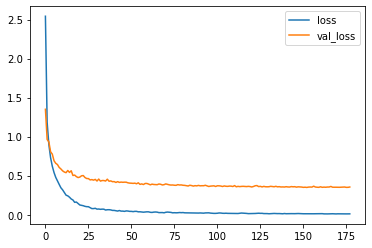

In [81]:
pd.DataFrame(model.history.history).plot()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
prediction = model.predict(X_test)
print(mean_squared_error(y_test, prediction)**0.5)
print(mean_absolute_error(y_test, prediction))
print(explained_variance_score(y_test, prediction))

394/394 [==============================] - 1s 3ms/step
0.5953593004237838
0.2808456973914826
0.957877559723419
